In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import datetime

In [10]:
# Read the data from Johns Hopkins Github repository
conf_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

confirmed_df = pd.read_csv(conf_url)
deaths_df = pd.read_csv(deaths_url)

In [18]:
confirmed_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,1,1,1,1,1,1,3,3,3,7
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,68,79,97,128,158,266,301,387,387,502
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,78,84,115,136,160,194,235,249,265,290
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,2,3,4,6,9,19,32,39,39,53
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,210,267,307,353,436,669,669,818,1029,1219


In [20]:
# Extract the Scandinavia countries and combine to dataframe
scandic = ["Sweden", "Norway", "Denmark"]
scandic_conf_df = confirmed_df[confirmed_df["Country/Region"].isin(scandic)]
scandic_deaths_df = deaths_df[deaths_df["Country/Region"].isin(scandic)]

In [22]:
# Drop not used columns
scandic_conf_df = scandic_conf_df.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()
scandic_deaths_df = scandic_deaths_df.drop(["Province/State", "Lat", "Long"], axis=1).groupby("Country/Region").sum()

In [24]:
scandic_conf_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Denmark,0,0,0,0,0,0,0,0,0,0,...,1025,1116,1225,1337,1420,1514,1572,1718,1862,2023
Norway,0,0,0,0,0,0,0,0,0,0,...,1463,1550,1746,1914,2118,2385,2621,2863,3084,3369
Sweden,0,0,0,0,0,0,0,0,0,1,...,1190,1279,1439,1639,1763,1934,2046,2286,2526,2840


In [26]:
# Create lists from the dataframe to use in creation of long dataframe
dates = scandic_conf_df.keys()

sweden_cases = []
sweden_deaths = []

norway_cases = []
norway_deaths = []

denmark_cases = []
denmark_deaths = []

for i in dates:
    sweden_sum = scandic_conf_df[i]["Sweden"]
    norway_sum = scandic_conf_df[i]["Norway"]
    denmark_sum = scandic_conf_df[i]["Denmark"]
    
    sweden_death_sum = scandic_deaths_df[i]["Sweden"]
    norway_death_sum = scandic_deaths_df[i]["Norway"]
    denmark_death_sum = scandic_deaths_df[i]["Denmark"]
    
    sweden_cases.append(sweden_sum)
    norway_cases.append(norway_sum)
    denmark_cases.append(denmark_sum)
    
    sweden_deaths.append(sweden_death_sum)
    norway_deaths.append(norway_death_sum)
    denmark_deaths.append(denmark_death_sum)

In [33]:
# Make dataframe that starts from a value of confirmed cases

s5 = 36
n5 = 37
d5 = 41

scandi_outbreak = pd.DataFrame({"Sweden": sweden_cases[s5:], "Norway": norway_cases[n5:] + (len(sweden_cases[s5:]) - len(norway_cases[n5:])) * [None],
                                "Denmark": denmark_cases[d5:] + (len(sweden_cases[s5:]) - len(denmark_cases[d5:])) * [None]})

In [36]:
scandi_outbreak.tail()

,Sweden,Norway,Denmark
24,1934,2621.0,NaN
25,2046,2863.0,NaN
26,2286,3084.0,NaN
27,2526,3369.0,NaN
28,2840,NaN,NaN


In [41]:
# Rearrange the confirmed dataframe to long format with date as index
d = {"Date": scandic_conf_df.keys(), "Sweden": sweden_cases, "Norway": norway_cases, "Denmark": denmark_cases}
scandic_df = pd.DataFrame(data=d)
scandic_df = scandic_df.melt(id_vars=["Date"], var_name="Country", value_name="Confirmed")
scandic_df["Date"] = pd.to_datetime(scandic_df["Date"], format="%m/%d/%y")
scandic_df.set_index("Date", inplace=True)

,Date,Sweden,Norway,Denmark
60,3/22/20,1934,2385,1514
61,3/23/20,2046,2621,1572
62,3/24/20,2286,2863,1718
63,3/25/20,2526,3084,1862
64,3/26/20,2840,3369,2023


In [43]:
scandic_df.tail()

,Country,Confirmed
Date,,
2020-03-22,Denmark,1514
2020-03-23,Denmark,1572
2020-03-24,Denmark,1718
2020-03-25,Denmark,1862
2020-03-26,Denmark,2023


In [44]:
# Rearrange the deaths dataframe to long format with date as index
d = {"Date": scandic_deaths_df.keys(), "Sweden": sweden_deaths, "Norway": norway_deaths, "Denmark": denmark_deaths}
scandic_deaths_df = pd.DataFrame(data=d)
scandic_deaths_df = scandic_deaths_df.melt(id_vars=["Date"], var_name="Country", value_name="Deaths")
scandic_deaths_df["Date"] = pd.to_datetime(scandic_deaths_df["Date"])
scandic_deaths_df.set_index("Date", inplace=True)

In [47]:
# Calculate the daily increase in cases and add it to the dataframe
diff_list = []
for c in scandic_df["Country"].unique():
    diff_list.extend(scandic_df[scandic_df["Country"] == c]["Confirmed"].diff().values)
    
scandic_df["Increase"] = diff_list

In [50]:
scandic_df["2020-03-25":].tail(6)

,Country,Confirmed,Increase
Date,,,
2020-03-25,Sweden,2526,240.0
2020-03-26,Sweden,2840,314.0
2020-03-25,Norway,3084,221.0
2020-03-26,Norway,3369,285.0
2020-03-25,Denmark,1862,144.0
2020-03-26,Denmark,2023,161.0


In [51]:
# Set date intervals for plots

from_date = "2020-02-25"
to_date = ""

if to_date == "":
    to_date = str(scandic_df.index[-1].date())
    
# Set Seaborn style
sns.set_style("whitegrid", {"axes.facecolor": "1.0", "grid.color": ".95", "grid.linestyle": "--",})

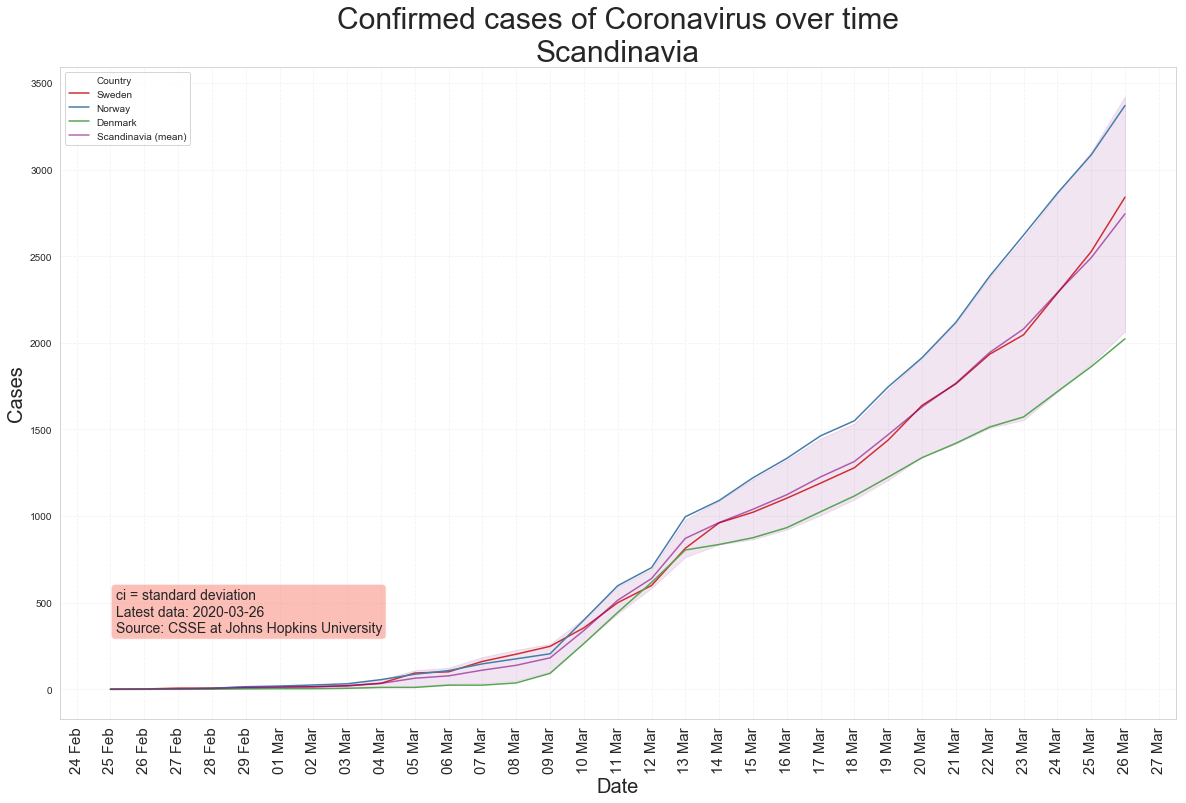

In [64]:
# Plot confirmed cases
fig, ax = plt.subplots(figsize=(20,12))

# Plot per country
sns.lineplot(x=scandic_df[from_date:to_date].index, y="Confirmed", data=scandic_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=3, desat=.8), hue="Country")

# Plot Scandinavian mean
sns.lineplot(x=scandic_df[from_date:to_date].index, y="Confirmed", data=scandic_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")

# Format confidence interval
ax.get_children()[0].set_alpha(.1)

# Create and display infotext
textstr = "\n".join((
    "ci = standard deviation",
    f"Latest data: {scandic_df.index[-1].date()}",
    "Source: CSSE at Johns Hopkins University"))
props = dict(boxstyle="round", facecolor="salmon", alpha=0.5)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14, verticalalignment="top", bbox=props)

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))

# Set title and axis parameters
plt.title("Confirmed cases of Coronavirus over time\nScandinavia", size=30)

plt.xlabel("Date", size=20)
plt.ylabel("Cases", size=20)

# Format xticks
plt.xticks(rotation=90, size=15)
fname = "scandi_conf_cases_" + str(datetime.date.today()) + ".jpg"
#plt.savefig(fname, format="jpg", dpi="figure", bbox_inches="tight")

plt.show()

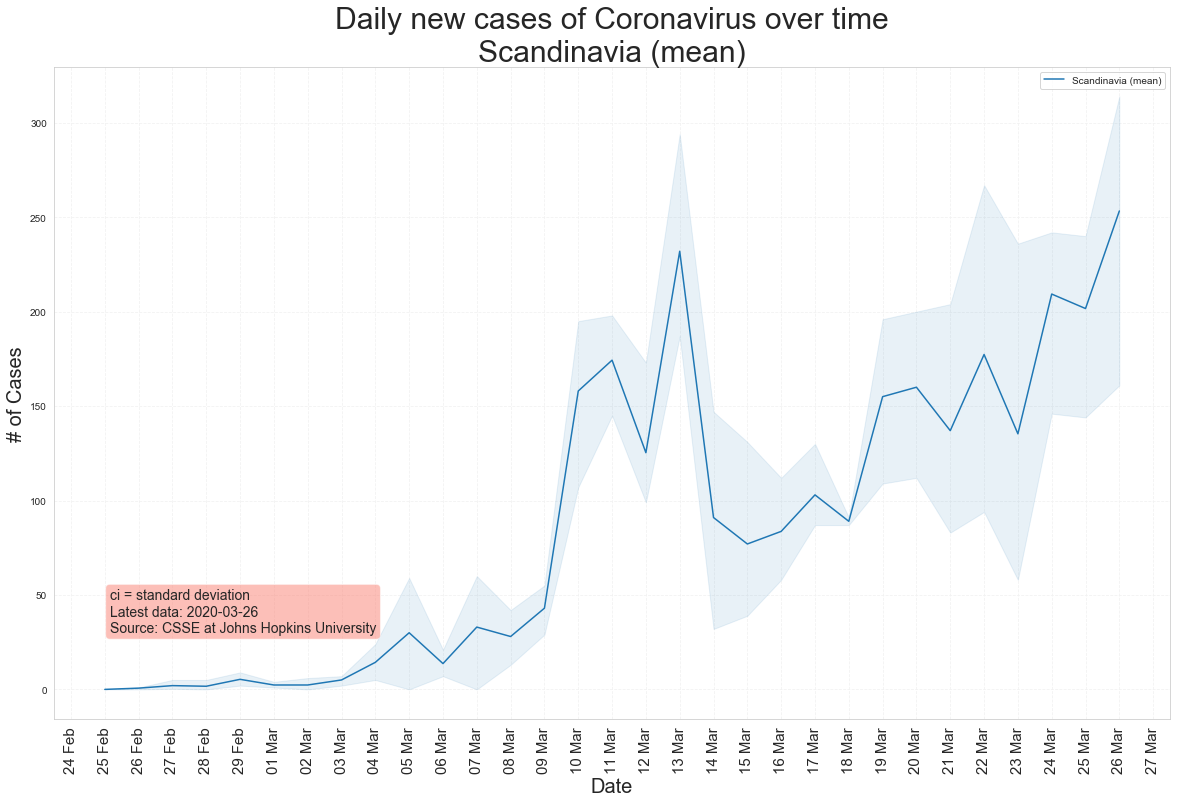

In [68]:
# Plot daily new cases
fig, ax = plt.subplots(figsize=(20,12))

# Plot Scandinavian mean
sns.lineplot(x=scandic_df[from_date:to_date].index, y="Increase", data=scandic_df[from_date:to_date], label="Scandinavia (mean)")

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Format confidence interval
ax.get_children()[0].set_alpha(.1)

# Create and display infotext
textstr = '\n'.join((
    "ci = standard deviation",
    f"Latest data: {scandic_df.index[-1].date()}",
    "Source: CSSE at Johns Hopkins University"))
props = dict(boxstyle='round', facecolor='salmon', alpha=0.5)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title('Daily new cases of Coronavirus over time\nScandinavia (mean)', size=30)

plt.xlabel('Date', size=20)
plt.ylabel('# of Cases', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)

plt.show()

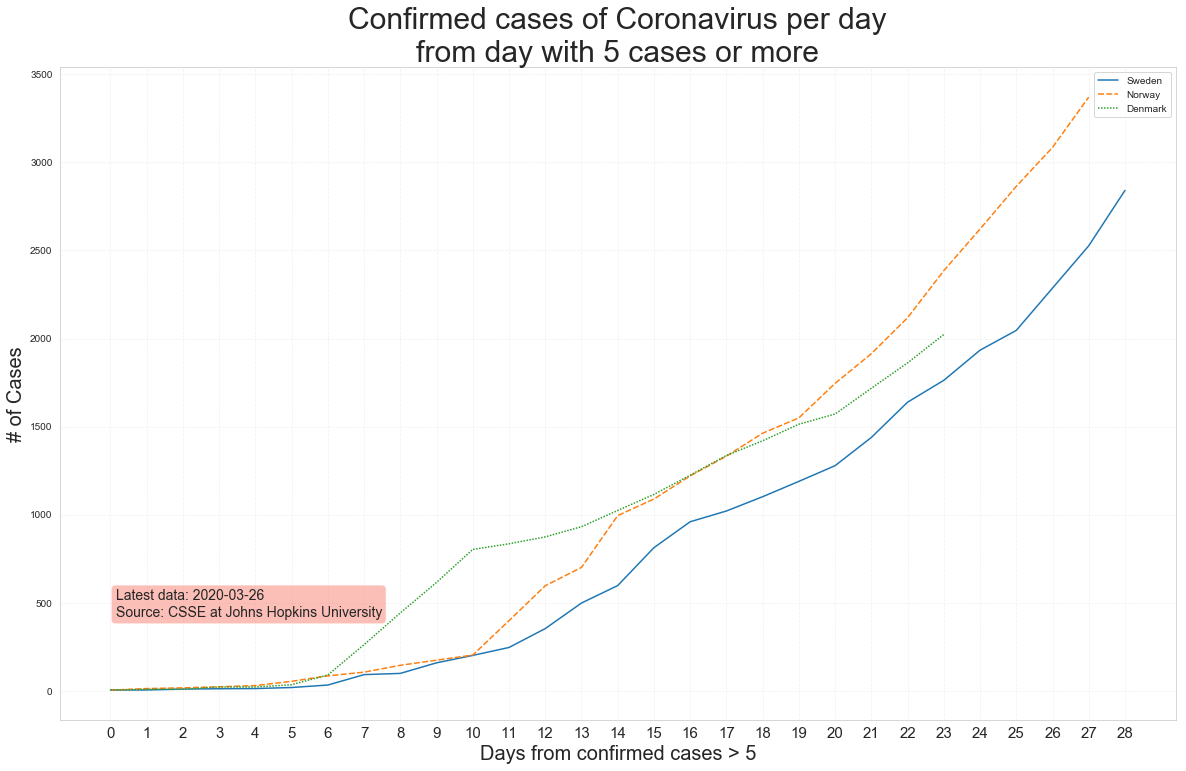

In [70]:
# Plot confirmed cases from day with X cases
fig, ax = plt.subplots(figsize=(20,12))
sns.lineplot(data=scandi_outbreak)


# Create and display infotext
textstr = '\n'.join((
    f"Latest data: {scandic_df.index[-1].date()}",
    "Source: CSSE at Johns Hopkins University"))
props = dict(boxstyle='round', facecolor='salmon', alpha=0.5)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title('Confirmed cases of Coronavirus per day\nfrom day with 5 cases or more', size=30)

plt.xlabel('Days from confirmed cases > 5', size=20)
plt.ylabel('# of Cases', size=20)

# Format xticks
plt.xticks(range(len(scandi_outbreak)), size=15)


# Save as jpg and show plot
fname = "scandinavia_conf_outbreak_" + str(datetime.date.today())+".jpg"
#plt.savefig(fname, format="jpg", dpi="figure", bbox_inches="tight")
plt.show()

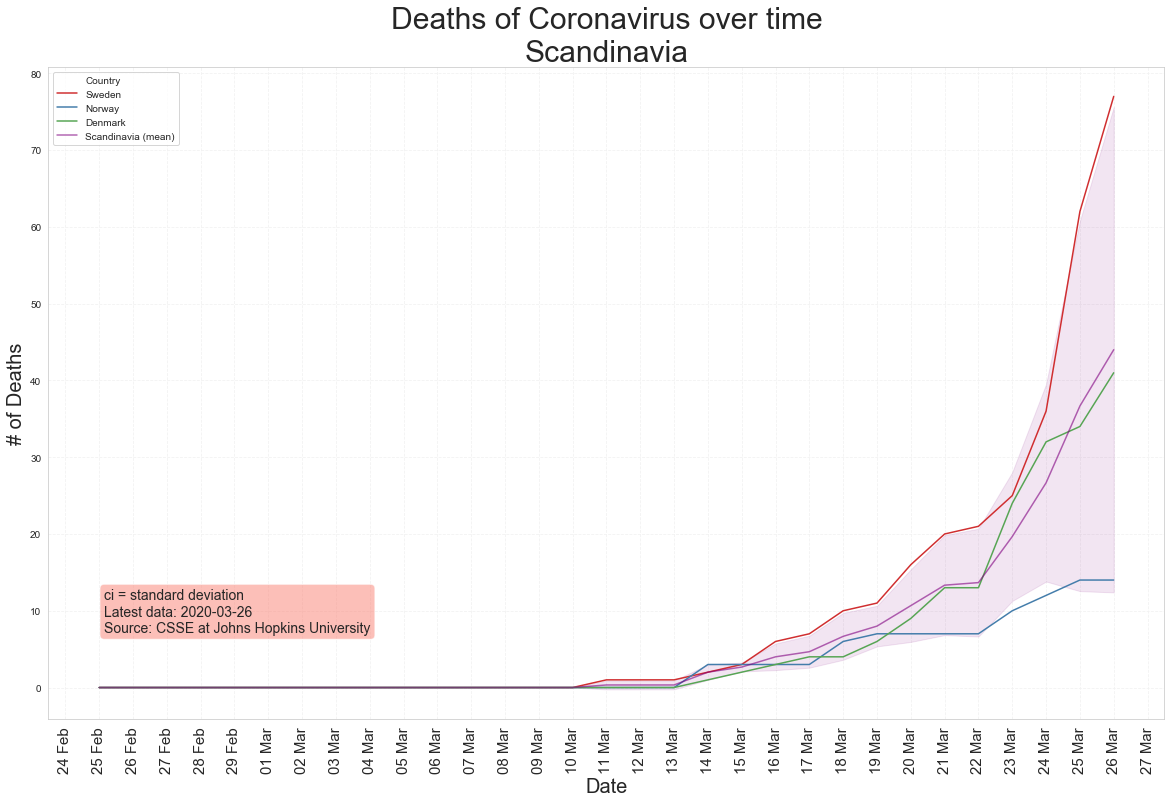

In [72]:
# Plot deaths
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Plot per country
sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths", data=scandic_deaths_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=3, desat=.8), hue="Country")

# Plot mean if set to true
plot_mean = True
if plot_mean:
    # Plot Scandinavian mean
    sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths", data=scandic_deaths_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")

    # Format confidence interval
    ax.get_children()[0].set_alpha(.1)
    textstr = "ci = standard deviation\n"

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Create and display infotext
textstr = textstr + '\n'.join((
    f"Latest data: {scandic_deaths_df.index[-1].date()}",
    "Source: CSSE at Johns Hopkins University"))
props = dict(boxstyle='round', facecolor='salmon', alpha=0.5)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title('Deaths of Coronavirus over time\nScandinavia', size=30)


plt.xlabel('Date', size=20)
plt.ylabel('# of Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)
plt.show()